In [257]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import os
from sklearn.naive_bayes import ComplementNB

In [258]:
df_train = pd.read_csv('/home/mo/Music/Training.csv')

In [259]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism
2739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
2740,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis
2741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis


In [260]:
df_train.isnull().sum().sort_values(ascending = False)

itching                 0
spinning_movements      0
altered_sensorium       0
muscle_pain             0
irritability            0
                       ..
abdominal_pain          0
constipation            0
back_pain               0
pain_behind_the_eyes    0
prognosis               0
Length: 133, dtype: int64

In [261]:
df_train['prognosis'].value_counts()

Fungal infection                           67
Dimorphic hemmorhoids(piles)               67
Hepatitis C                                67
Hepatitis D                                67
Hepatitis E                                67
Alcoholic hepatitis                        67
Tuberculosis                               67
Common Cold                                67
Pneumonia                                  67
Heart attack                               67
hepatitis A                                67
Varicose veins                             67
Hypothyroidism                             67
Hyperthyroidism                            67
Hypoglycemia                               67
Osteoarthristis                            67
Arthritis                                  67
(vertigo) Paroymsal  Positional Vertigo    67
Allergy                                    67
Hepatitis B                                67
Typhoid                                    67
Bronchial Asthma                  

**convert prognosis column to numerical**

In [262]:
le = preprocessing.LabelEncoder()
df_train['prognosis'] = le.fit_transform(df_train['prognosis'])

In [263]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
2739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
2740,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,31
2741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [264]:
X = df_train.drop(columns=['prognosis'])
y = df_train['prognosis']

**Splitiing data**

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44, shuffle = True)

<AxesSubplot: xlabel='prognosis', ylabel='count'>

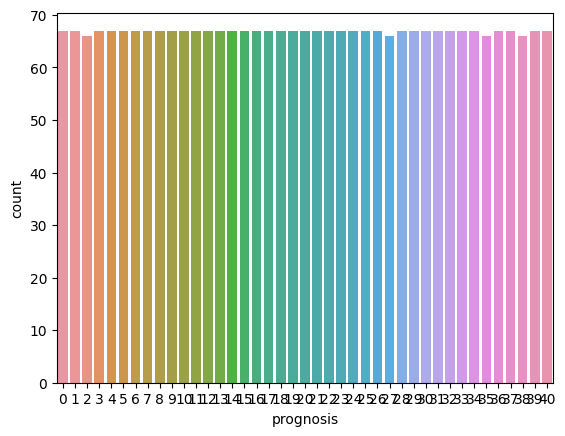

In [266]:
sns.countplot(x = "prognosis",data = df_train)

**Decision Tree Model**

In [267]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.884375
DecisionTreeClassifierModel Test Score is :  0.8541919805589308


**Random Forest Model**

In [268]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth = 3, n_estimators = 100, random_state = 44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9479166666666666
RandomForestClassifierModel Test Score is :  0.9392466585662211


**KNN**

In [278]:
Knn = KNeighborsClassifier(n_neighbors = 100)
Knn.fit(X_train, y_train)

print('Knn Train Score is : ' , Knn.score(X_train, y_train))
print('Knn Test Score is : ' , Knn.score(X_test, y_test))


Knn Train Score is :  0.9182291666666667
Knn Test Score is :  0.8930741190765492


In [270]:
# ComplementNB

In [271]:
Complement= ComplementNB()
Complement.fit(X_train, y_train)

print('Complement Train Score is : ' , Complement.score(X_train, y_train))
print('Complement Test Score is : ' , Complement.score(X_test, y_test))

Complement Train Score is :  0.9817708333333334
Complement Test Score is :  0.9756986634264885
